# Import libraries

In [1]:
import util
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tqdm import tqdm 
import stepic
from PIL import Image, ImageOps

plt.rcParams["figure.figsize"] = (5, 5)

# Loading images

### Using OpenCV

In [2]:

img_kyoto = cv2.imread("../images/ttt.bmp")
img_kyoto = cv2.cvtColor(img_kyoto, cv2.COLOR_BGR2GRAY)

img_kyoto = cv2.resize(img_kyoto, (450, 250), interpolation = cv2.INTER_AREA)
img_kyoto.shape 

(250, 450)

### Using Pillow

In [3]:
img_kyoto = Image.open('../images/kyoto-2.bmp')
img_kyoto.size

(400, 300)

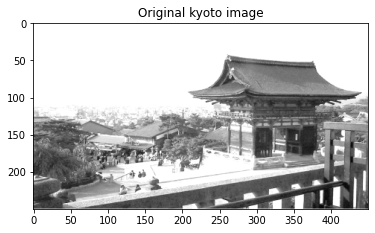

In [5]:
plt.imshow(img_kyoto, cmap = 'gray')
plt.title("Original kyoto image")
plt.show()

# Define mask

In [6]:
# np_mask = np.array([[1, 0], [0, 1]])

np_mask = np.array([[0, 1], [1, 0]])

# Small matrix test

In [36]:
img_example = np.random.randint(0, high = 256, size = 48).reshape(4, 4, 3)
img_example

array([[[  8, 149, 242],
        [233,  34, 132],
        [214,  93, 187],
        [ 67, 161,  16]],

       [[169,  86, 140],
        [ 60, 223,  49],
        [ 79,  93, 204],
        [ 61, 237, 143]],

       [[163, 158, 171],
        [152,  50, 177],
        [211,  36, 241],
        [ 53,  45, 191]],

       [[252,  82,   6],
        [206,  79,  56],
        [121, 182,  29],
        [219,  44,  36]]])

(4, 4)


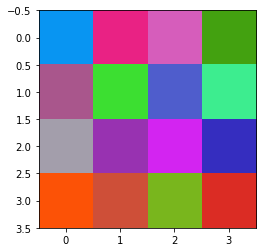

In [37]:
pillowExample = Image.fromarray(img_example.astype('uint8'), 'RGB')

print(pillowExample.size)

plt.imshow(np.asarray(pillowExample))
plt.show()

In [38]:
print ( util.calculate_count_groups(img_example, -np_mask) )

(0.5, 0.5)


In [39]:
print ( util.calculate_count_groups(img_example, np_mask) )

(0.5, 0.5)


In [40]:
r_m, s_m, r_neg_m, s_neg_m = [], [], [], []

In [12]:
# msg_stego = "sparklingPhotons"      # This data is too large, because you need 8 bytes from the image to store 1 message byte
msg_stego = "spark"  # bigger than this --> ValueError

for i in range(4):
    img_encoded = stepic.encode(pillowExample, msg_stego[:4*(i+1)].encode('utf-8'))
    np_img_encoded = np.array(img_encoded)
    temp1, temp2 = util.calculate_count_groups(np_img_encoded, np_mask)
    r_m.append(temp1); s_m.append(temp2)
    temp1, temp2 = util.calculate_count_groups(np_img_encoded, -np_mask)
    r_neg_m.append(temp1); s_neg_m.append(temp2)

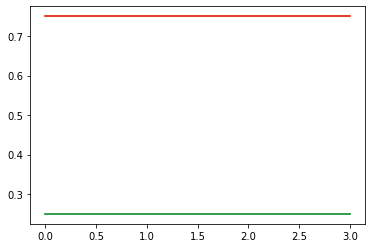

In [13]:
plt.plot(range(len(r_m)), r_m)
plt.plot(range(len(s_m)), s_m)
plt.plot(range(len(r_neg_m)), r_neg_m)
plt.plot(range(len(s_neg_m)), s_neg_m)

# Experimentation - Stepic

In [14]:
msg_stego = "photons awesome"*1000
len(msg_stego)

15000

In [15]:
r_m, s_m, r_neg_m, s_neg_m = [], [], [], []

In [2]:
print(util.calculate_count_groups(img_kyoto, -np_mask))
print(util.calculate_count_groups(img_kyoto, np_mask))

In [17]:
for i in range(100):
    img_encoded = stepic.encode(img_kyoto, msg_stego[:150*(i+1)].encode('utf-8'))
    np_img_encoded = np.array(img_encoded)
    # print(np_img_encoded.shape)
    temp1, temp2 = util.calculate_count_groups(np_img_encoded, np_mask)
    r_m.append(temp1); s_m.append(temp2)
    temp1, temp2 = util.calculate_count_groups(np_img_encoded, -np_mask)
    r_neg_m.append(temp1); s_neg_m.append(temp2)

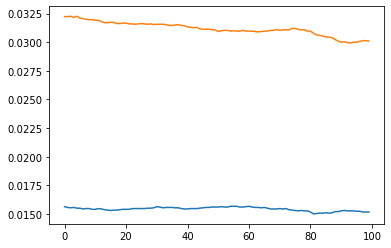

In [22]:
plt.plot(range(len(r_m)), r_m)
# plt.plot(range(len(s_m)), s_m)
plt.plot(range(len(r_neg_m)), r_neg_m)
# plt.plot(range(len(s_neg_m)), s_neg_m)

# Testing S-Tools

Note: The passphrase for every stego-image is the name of the image (without file extension)

In [23]:
messageFile = open("secretMessage2.txt", "w")
msgString = util.randomString(70000)
messageFile.write(msgString)
messageFile.close()

In [24]:
hiddenKyoto1 = cv2.imread("../images/kyoto-2_hidden.bmp")    # This one has about 25000 bytes hidden
hiddenKyoto2 = cv2.imread("../images/kyoto-2_hidden2.bmp")      # This one nearly fills up the full capacity
hiddenKyoto3 = cv2.imread("../images/kyoto-2_hidden3.bmp")
hiddenKyoto4 = cv2.imread("../images/kyoto-2_hidden4.bmp")
hiddenKyoto5 = cv2.imread("../images/kyoto-2_hidden5.bmp")

In [25]:
r_m, s_m, r_neg_m, s_neg_m = [], [], [], []

In [ ]:
fileNames = [hiddenKyoto1, hiddenKyoto2, hiddenKyoto3, hiddenKyoto4, hiddenKyoto5]

for i in range(5):
    temp1, temp2 = util.calculate_count_groups(fileNames[i], np_mask)
    r_m.append(temp1); s_m.append(temp2)
    temp1, temp2 = util.calculate_count_groups(fileNames[i], -np_mask)
    r_neg_m.append(temp1); s_neg_m.append(temp2)

In [ ]:
plt.plot(range(len(r_m)), r_m)
plt.plot(range(len(s_m)), s_m)
plt.plot(range(len(r_neg_m)), r_neg_m)
plt.plot(range(len(s_neg_m)), s_neg_m)

# Flipping LSBs instead of hiding messages

In [55]:
r_m, s_m, r_neg_m, s_neg_m = [], [], [], []

In [56]:
def simpleLSBFlipperNumpy(image, n):
    flattenedImg = image.reshape(1, -1)
    flattenedImg[0][:n] = np.bitwise_xor(flattenedImg[0][:n], np.ones((n)).astype('uint8'))       # 0 XOR 1 = 1 ; 1 XOR 1 = 0
    return flattenedImg.reshape(image.shape)

In [58]:
from tqdm import tqdm
for i in tqdm(range(100)):
    flippedLSBs = simpleLSBFlipperNumpy(img_kyoto, int(img_kyoto.shape[0] * img_kyoto.shape[1] * .03 *(i+1)))
    temp1, temp2 = util.calculate_count_groups(flippedLSBs, np_mask)
    r_m.append(temp1); s_m.append(temp2)
    temp1, temp2 = util.calculate_count_groups(flippedLSBs, -np_mask)
    r_neg_m.append(temp1); s_neg_m.append(temp2)

100%|██████████| 100/100 [02:03<00:00,  1.23s/it]


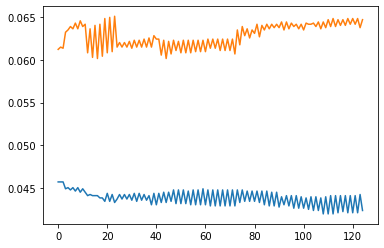

In [59]:
plt.plot(range(len(r_m)), r_m)
plt.plot(range(len(r_neg_m)), r_neg_m)


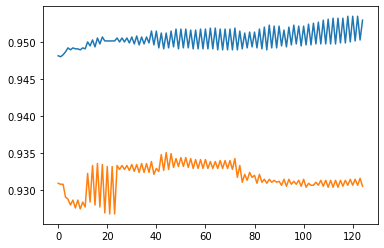

In [60]:
plt.plot(range(len(s_m)), s_m)
plt.plot(range(len(s_neg_m)), s_neg_m)

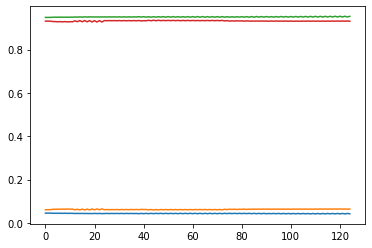

In [61]:
plt.plot(range(len(r_m)), r_m)
plt.plot(range(len(r_neg_m)), r_neg_m)
plt.plot(range(len(s_m)), s_m)
plt.plot(range(len(s_neg_m)), s_neg_m)

# Random scattering

In [5]:
num_pixels = img_kyoto.shape[0] * img_kyoto.shape[1];

In [6]:
def random_flipper(img, indices):
    mod_img = np.copy(img)
    # z[ind[np.where(z[ind[:,0], ind[:,1]] %2 ==0)]] += 1
    ind_even = indices[np.where(img[indices[:,0], indices[:,1]] % 2 == 0)]; #print(ind_even.shape)
    mod_img[ind_even] += 1
    ind_odd = np.setdiff1d(indices, ind_even)
    mod_img[ind_odd] -= 1
    return mod_img

In [1]:
height, width = img_kyoto.shape[0], img_kyoto.shape[1]

for i in tqdm(range(0, 101, 5)):
    indices = np.random.randint([0,0], [height, height], (int(.05 * num_pixels),2)) # change  2nd height to width later
    stego_img = random_flipper(img_kyoto, indices)

    im_rm, im_sm = util.calculate_count_groups(stego_img, np_mask)
    r_m.append(im_rm); s_m.append(im_sm)

    im_rm, im_sm = util.calculate_count_groups(stego_img, -np_mask)
    r_neg_m.append(im_rm); s_neg_m.append(im_sm)


# Random scattering 2

In [3]:
r_m, s_m, r_neg_m, s_neg_m = [], [], [], []

In [4]:
# np_mask = np.array([[0, 1], [1, 0]])
np_mask = util.mask

print(util.calculate_count_groups(img_kyoto, -np_mask))
print(util.calculate_count_groups(img_kyoto, np_mask))

(0.42778666666666665, 0.4042133333333333)
(0.41218666666666665, 0.41288)


In [5]:
for i in tqdm(range(20)):
    img_encoded = util.scattered_lsb_flipping(img_kyoto, 0.05*i)
    temp1, temp2 = util.calculate_count_groups(img_encoded, np_mask)
    r_m.append(temp1); s_m.append(temp2)
    temp1, temp2 = util.calculate_count_groups(img_encoded, -np_mask)
    r_neg_m.append(temp1); s_neg_m.append(temp2)

100%|██████████| 20/20 [03:13<00:00,  9.67s/it]


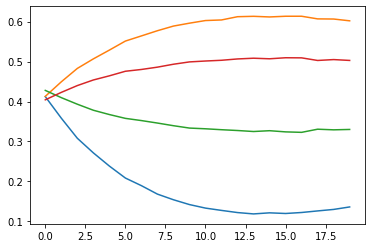

In [18]:
# %matplotlib notebook
# plt.ion
plt.plot(range(len(r_m)), r_m)
plt.plot(range(len(s_m)), s_m)
plt.plot(range(len(r_neg_m)), r_neg_m)
plt.plot(range(len(s_neg_m)), s_neg_m)
plt.show()

# Estimating Rm(1/2) and Sm(1/2) 
## (using the quadratic equation in the paper)

In [19]:
# Flipping the LSBs of 50 percent of the total pixels

img_half_flipped = util.scattered_lsb_flipping(img_kyoto, 0.5)
rm_half, sm_half = util.calculate_count_groups(img_half_flipped, np_mask)
r_minus_m_half, s_minus_m_half = util.calculate_count_groups(img_half_flipped, -np_mask)

half_flipped = [rm_half, sm_half, r_minus_m_half, s_minus_m_half]

In [20]:
# Flipping the LSBs of all pixels

img_all_flipped = util.scattered_lsb_flipping(img_kyoto, 1)
rm_all, sm_all = util.calculate_count_groups(img_all_flipped, np_mask)
r_minus_m_all, s_minus_m_all = util.calculate_count_groups(img_all_flipped, -np_mask)

all_flipped = [rm_all, sm_all, r_minus_m_all, s_minus_m_all]

In [21]:
roots = util.RS_quadratic_solver(half_flipped, all_flipped)

print(roots)

[0.97927769 0.32287756]


In [22]:
# Flipping x% pixels

img_x_flipped = util.scattered_lsb_flipping(img_kyoto, min(roots))
rm_x, sm_x = util.calculate_count_groups(img_x_flipped, np_mask)
r_minus_m_x, s_minus_m_x = util.calculate_count_groups(img_x_flipped, -np_mask)

# x_flipped = [rm_x, sm_x, r_minus_m_x, s_minus_m_x]

In [23]:
r_m = [rm_half, rm_x, rm_all]
s_m = [sm_half, sm_x, sm_all]
r_neg_m = [r_minus_m_half, r_minus_m_all]
s_neg_m = [s_minus_m_half, s_minus_m_all]

In [24]:
line1 = np.polyfit([0, 1], r_neg_m, 1)
line2 = np.polyfit([0, 1], s_neg_m, 1)

poly1 = np.polyfit([0, min(roots), 1], r_m, 2)
poly2 = np.polyfit([0, min(roots), 1], s_m, 2)

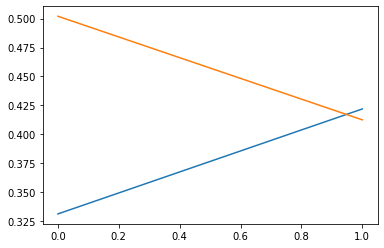

In [25]:
line1_curve = np.poly1d(line1)
x_axis_1 = np.linspace(0, 1, 10)
y_axis_1 = line1_curve(x_axis_1)

line2_curve = np.poly1d(line2)
x_axis_2 = np.linspace(0, 1, 10)
y_axis_2 = line2_curve(x_axis_2)

plt.plot(x_axis_1, y_axis_1)
plt.plot(x_axis_2, y_axis_2)
plt.show()

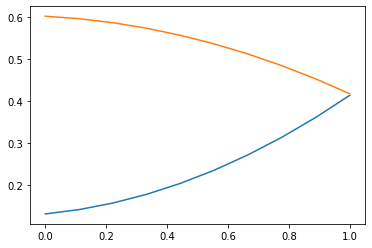

In [30]:
x_axis_p1 = np.linspace(0, 1, 10)
y_axis_p1 = np.polyval(poly1, x_axis_p1)

x_axis_p2 = np.linspace(0, 1, 10)
y_axis_p2 = np.polyval(poly2, x_axis_p2)

plt.plot(x_axis_p1, y_axis_p1)
plt.plot(x_axis_p2, y_axis_p2)
plt.show()